# LinkedIn Reviews Sentiment Analysis
App Reviews Sentiment Analysis means evaluating and understanding the sentiment expressed in user reviews of mobile application

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("C:\\Mrunal\\Course_datasets\\linkedin-reviews.csv")

In [4]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


# EDA
Plotting the distribution of rating

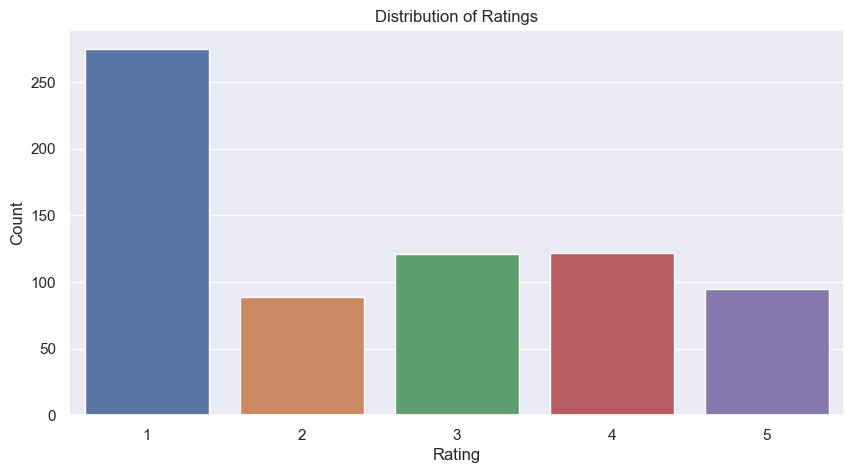

In [7]:
sns.set(style='darkgrid') #this is bckground and can be white, dark, whitegrid, darkgrid, ticks
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Addding Sentitment Labels In data
We will use Textblob library.TextBlob provides a polarity scores from -1 (very Negative)to +1 ( very Positive)for givem text.
we can use this score to classify each reviews as positive , negative or neutral


In [8]:
!pip install textblob

In [9]:

from textblob import TextBlob

In [10]:
def sen_analysis(review):
    sentiment=TextBlob(review).sentiment
    if sentiment.polarity>0.1:
        return 'Positive'
    elif  sentiment.polarity<-0.1:
        return 'Negative'
    else:
        return 'Neutral'
        

In [11]:
df['Sentiment']=df['Review'].apply(sen_analysis)

In [12]:
df.sample(10)

,Review,Rating,Sentiment
631,Space key on keyboard not working. Hope this i...,4,Neutral
93,"Didn't like it. I'm uninstalling, other review...",1,Neutral
392,"Can't even use it. If it gets fixed, I will ke...",1,Neutral
471,I love this app.it will help me expand my world!!,5,Positive
58,Ok but needs an option to move to SD card,2,Positive
206,I like it in general but it would be even bett...,4,Positive
173,this real slow,1,Negative
164,"Worked exactly once the first time I run it, a...",4,Positive
451,Someone pls fix this app.,1,Neutral
103,"Works well, just wish it had a few more featur...",4,Positive


# Analyzing App Review Sentiments

In [13]:
sent_dist=df['Sentiment'].value_counts()
sent_dist

Sentiment
Positive    298
Neutral     297
Negative    107
Name: count, dtype: int64

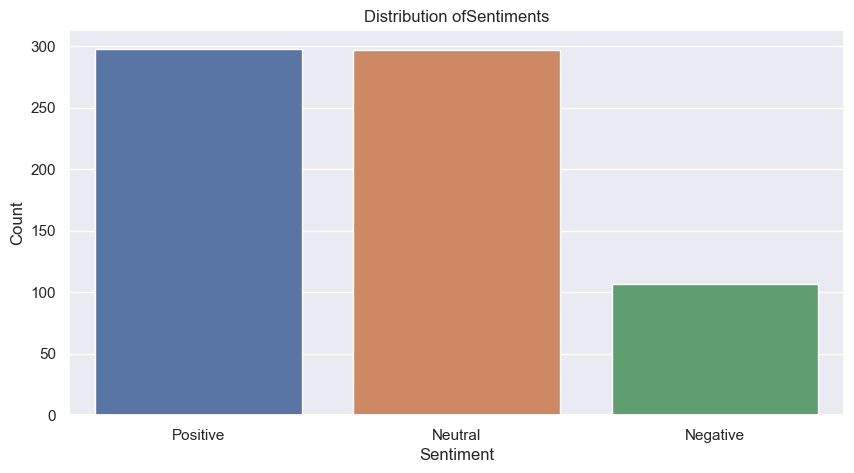

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x=sent_dist.index,y=sent_dist.values)
plt.title('Distribution ofSentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# So We can see although the app has low ratings,still the reviews dont use many negative wordws in the reviews for the app
now we will explore the relationship between the sentiments and the rating. This analysis can help us understand whether there is correlation between the sentiment of the text and numerical ratings

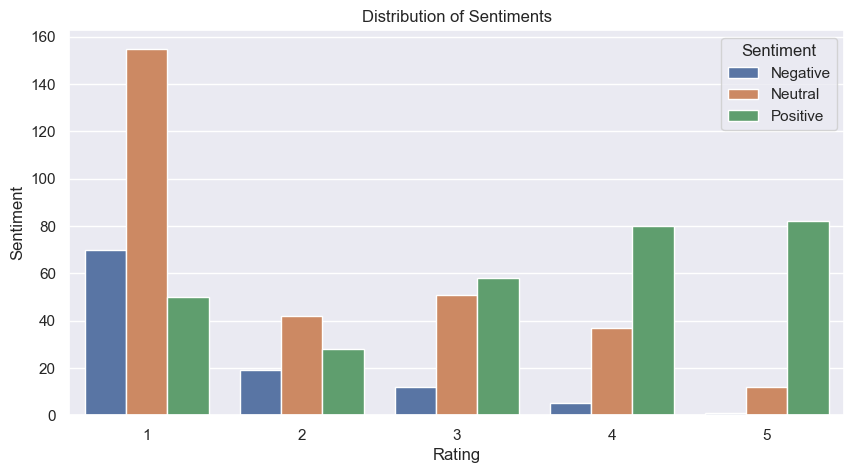

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Rating',hue='Sentiment')
plt.title('Distribution of Sentiments')
plt.xlabel('Rating')
plt.ylabel('Sentiment')
plt.show()

# Summary:
App review sentiment analysis is valuable tool for busniess to understand user feedback prioritize features,updates and maintain positive user community it involves using data analysis techniques to determine whether the sentimenrt in the reviews are positive,negative and neutral